In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install utils

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ae/f6/724d2d236797ea7479a5a7ec8e69c2bee60cad70273cf25078810415ae2d/fonttools-4.43.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/155.5 kB 1.4 MB/s e


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline


In [3]:
#Function to find closest centroids to the given points
def closest_centroids(X,centroids):
  K = centroids.shape[0]
  m = X.shape[0]
  idx = np.zeros(m,dtype=int)
  for i in range(m):
    dist=[]
    for j in range(K):
      norm = np.linalg.norm(X[i]-centroids[j])
      dist.append(norm)
    idx[i] = np.argmin(dist)
  return idx

In [4]:
def new_centroids(X,idx,K):
  m,n=X.shape
  centroid = np.zeros((K,n))
  for k in range(K):
    points = X[idx==k]
    centroid[k] = np.mean(points,axis=0)
  return centroid


In [5]:
def run_kMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        idx = closest_centroids(X, centroids)
        centroids = new_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [6]:
def initial(X,k):
  rand = np.random.permutation(X.shape[0])
  centroid = X[rand[:k]]
  return centroid
  

In [7]:
org_img = plt.imread('dog.png')

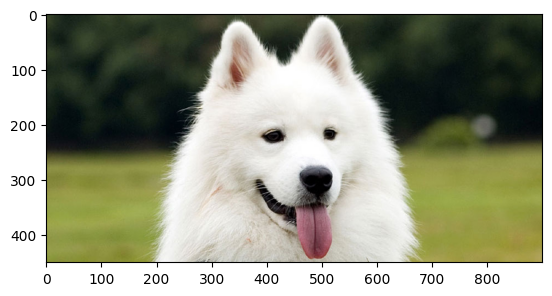

In [8]:
plt.imshow(org_img)

In [9]:
org_img.shape

(450, 900, 3)

In [10]:
length = 450*900

In [14]:
X_img = np.reshape(org_img,(length,3))

In [17]:
K = 8
max_iters = 10
init = initial(X_img,K)
centroids, idx = run_kMeans(X_img,init,max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [18]:
idx = closest_centroids(X_img,centroids)
X_rec = centroids[idx,:]
X_rec = np.reshape(X_rec,org_img.shape)

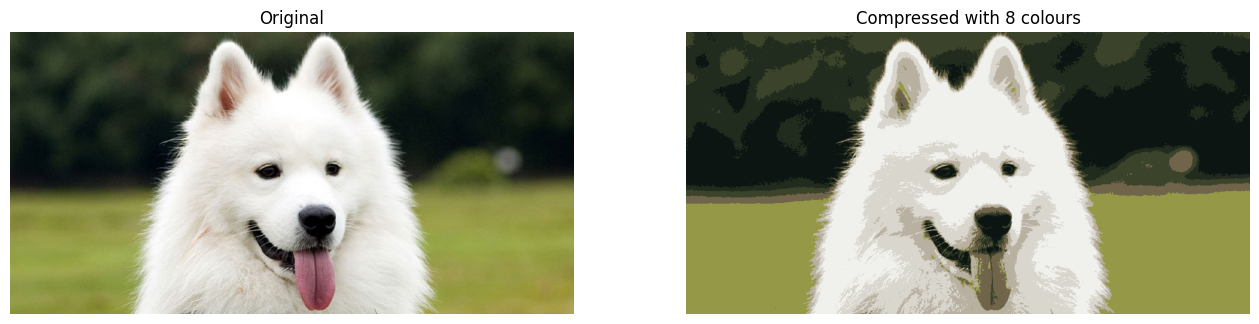

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(org_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_rec)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()